In [196]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [197]:
mean_01=np.array([1,1])
cov_01=np.array([[1,0.1],[0,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1,0.1],[0.1,1.2]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)

dist_02=np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01.shape)
print(np.cov(dist_01.T))

(500, 2)
[[ 0.90792659  0.1109046 ]
 [ 0.1109046   1.07798463]]


/home/aayush/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


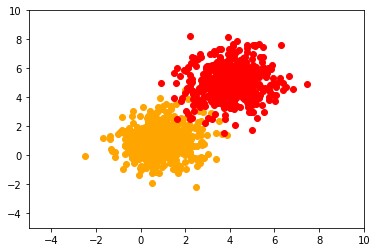

In [198]:
plt.figure(0)
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist_01[:,0],dist_01[:,1],color='orange')
plt.scatter(dist_02[:,0],dist_02[:,1],color='red')
plt.show()

In [199]:
r=dist_01.shape[0]+dist_02.shape[0]
c=dist_01.shape[1]+1
data=np.zeros((r,c))
print(data.shape)
data[:dist_01.shape[0],:2]=dist_01
data[dist_01.shape[0]:,:2]=dist_02
data[dist_01.shape[0]:,-1]=1.0
print(data)
print(data.mean(axis=0))

(1000, 3)
[[ 0.32345182  0.39576908  0.        ]
 [ 0.58313493  0.74915448  0.        ]
 [ 0.61351392  2.11614948  0.        ]
 ..., 
 [ 4.75014234  4.14036132  1.        ]
 [ 5.94620581  4.8868242   1.        ]
 [ 4.33641226  4.20794778  1.        ]]
[ 2.46743856  3.01990205  0.5       ]


In [200]:
np.random.shuffle(data)
print(data[0:10])

[[ 2.72916054  2.38027229  0.        ]
 [ 4.18435829  4.68210849  1.        ]
 [ 4.22008578  4.47206501  1.        ]
 [ 5.14982184  7.60906061  1.        ]
 [ 0.55735328 -0.70750935  0.        ]
 [ 4.24916503  5.4928447   1.        ]
 [ 1.64700912  0.7780911   0.        ]
 [ 3.13494228  4.10127886  1.        ]
 [ 0.67218256  0.78043664  0.        ]
 [ 2.10693544  0.58560112  0.        ]]


In [201]:
def distance(x1,x2):
    d=np.sqrt(((x1-x2)**2).sum())
    return d
def knn(X_train,Y_train,xt,k=5):
    vals=[]
    for ix in range(X_train.shape[0]):
        d=distance(X_train[ix],xt)
        vals.append([d,Y_train[ix]])
    sorted_labels=sorted(vals,key=lambda z: z[0])
    neighbours=np.asarray(sorted_labels)[:k,-1]
    freq=np.unique(neighbours,return_counts=True)
    return freq[0][freq[1].argmax()]

In [202]:
test_point=np.array([3,2])

print(knn(data[:,:2],data[:,-1],test_point))

0.0


In [203]:
split=int(.75*data.shape[0])

train_data_X=data[:split,:2]
train_data_Y=data[:split,-1]
test_data_X=data[split:,:2]
test_data_Y=data[split:,-1]

print(train_data_X.shape,train_data_Y.shape)
print(test_data_X.shape,test_data_Y.shape)

(750, 2) (750,)
(250, 2) (250,)


In [204]:
preds=[]

for ix in range(test_data_X.shape[0]):
    preds.append(knn(train_data_X,train_data_Y,test_data_X[ix]))
preds=np.asarray(preds)

print(preds.shape)

(250,)


In [205]:
100*float((test_data_Y == preds).sum())/preds.shape[0]

98.8